In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url ='https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
response= requests.get(url)

In [ ]:
soup = BeautifulSoup(response.text,'html.parser')
soup.text

In [ ]:
soup.find('table',class_="wikitable sortable")


In [ ]:
table = soup.find_all('table')[0]
table.text

In [ ]:
world_title = table.find_all('th')

In [ ]:
world_title_table = [ title.text.strip() for title in world_title]
print(world_title_table)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(columns= world_title_table) #under the hood it is passing this ['Rank', 'Name', 'Industry', 'Revenue (USD billions)', 'Employees', 'Headquarters']] to the dataframe function
df

In [ ]:
column_data = table.find_all('tr')
column_data

In [ ]:
ind_row_data = []
for row in column_data[1:]:
    row_data = row.find_all('td')
    ind_row_data = [ data.text.strip() for data in row_data]
    length = len(df)
    df.loc[length] = ind_row_data
    # print(ind_row_data)
df

In [ ]:
df.to_csv('world_top_comp',index=False)

In [30]:
df = pd.read_csv('world_top_comp')

In [31]:
company_revenue= df[['Name','Revenue (USD millions)']]
company_revenue.to_csv('companies_with_rev.csv')
    

In [32]:
company_revenue = pd.read_csv('companies_with_rev.csv')#,index_col=1)

In [45]:
company_revenue.sort_values(['Revenue (USD millions)'],ascending=True,inplace=True)

In [42]:
company_revenue.drop('Unnamed: 0',axis=1,inplace=True)

In [46]:
company_revenue.head()


,Name,Revenue (USD millions)
38,State Farm,"104,199"
37,Humana,"106,374"
36,Target Corporation,"107,412"
35,Freddie Mac,"108,050"
34,Goldman Sachs,"108,418"


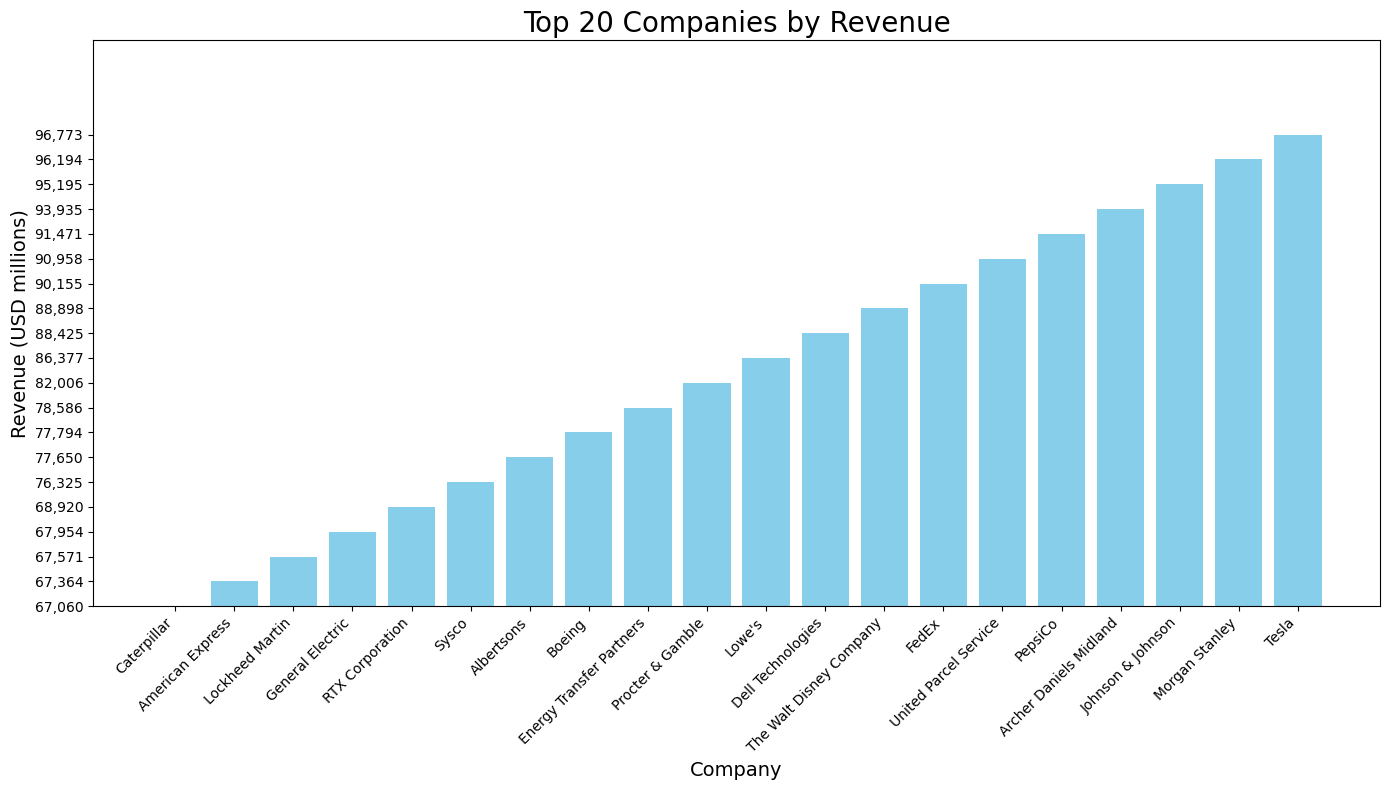

In [48]:

# Selecting the top 20 companies
df_top20 = company_revenue.tail(20)  # Assumes the DataFrame is already sorted in descending order

# Setting up the plot
plt.figure(figsize=(14, 8))
plt.bar(df_top20['Name'], df_top20['Revenue (USD millions)'], color='skyblue')

# Adding title and labels
plt.title('Top 20 Companies by Revenue', fontsize=20)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Revenue (USD millions)', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding a bottom margin for bars
plt.gca().margins(y=0.2)

# Displaying the plot
plt.tight_layout()
plt.savefig('top_20_companies_by_revenue.jpg', format='jpg')
plt.show()
